In [22]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
cd logs

[Errno 2] No such file or directory: 'logs'
/home/doom/tmp/logs


In [8]:
ls

1.tgz  access.log-20160626  app004  app006


In [3]:
%run /home/doom/github/NginxConfParser/nginxlogparser.py

In [4]:
result = logparser('app006.log')

In [25]:
from pandas import Series, DataFrame, Panel

In [26]:
dtindex = ['request_time', 'remote_addr', 'http_referer', 'time_local', 'request', 'bytes_sent', 'status', 'http_user_agent', 'host']
df = DataFrame(result, columns=dtindex)

In [27]:
df['status'] = df['status'].astype('int')

In [28]:
df.index = pd.to_datetime(df.pop('time_local'))

In [29]:
import pylab
pylab.rcParams['figure.figsize'] = 10, 5

NonGuiException: 

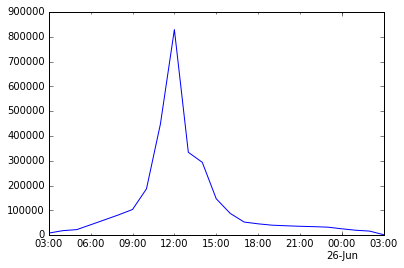

In [21]:
df_s = df['status'].resample('1h').count()
df_s.plot()

In [30]:
df['status'].value_counts()

200    1304688
499     741384
502     400075
302     249052
404     151381
500     137857
401      11012
504       6611
301       4316
304       3987
400        446
503        432
206        248
403         81
405         18
408          1
Name: status, dtype: int64

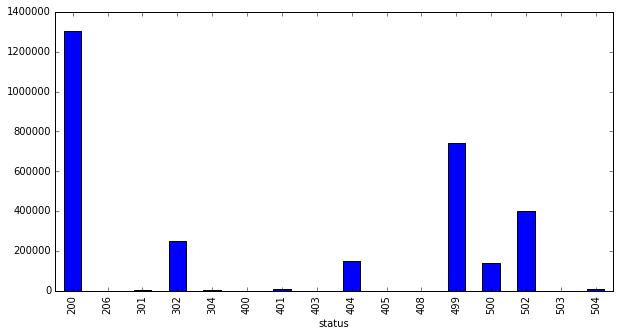

In [31]:
grouped_status = df.groupby('status')
grouped_status.size().plot(kind='bar')

In [60]:
df[:1]

,request_time,remote_addr,http_referer,request,bytes_sent,status,http_user_agent,host
time_local,,,,,,,,
2016-06-25 03:32:11,0.000,100.97.91.19,-,HEAD / HTTP/1.0,151,200,-,_


In [41]:
t_span = '60t'
df_200 = df['status'][df['status'] == 200].resample(t_span).count()
df_502 = df['status'][df['status'] == 502].resample(t_span).count()
df_499 = df['status'][df['status'] == 499].resample(t_span).count()
df_404 = df['status'][df['status'] == 404].resample(t_span).count()
df_302 = df['status'][df['status'] == 302].resample(t_span).count()
df_500 = df['status'][df['status'] == 500].resample(t_span).count()

In [44]:
status_df = DataFrame({'OK': df_200, 
                       'Bad Gateway': df_502, 
                       'Client Closed': df_499, 
                       'Found': df_302, 
                       'Not Found': df_404})


In [46]:
status_df.fillna(0, inplace=True)
status_df[0:5]

,Bad Gateway,Client Closed,Found,Not Found,OK
time_local,,,,,
2016-06-25 03:00:00,0.0,2.0,225,227,8053
2016-06-25 04:00:00,0.0,7.0,546,453,17189
2016-06-25 05:00:00,0.0,16.0,953,925,20398
2016-06-25 06:00:00,0.0,53.0,3601,3189,34548
2016-06-25 07:00:00,0.0,83.0,6072,6367,48987


NonGuiException: 

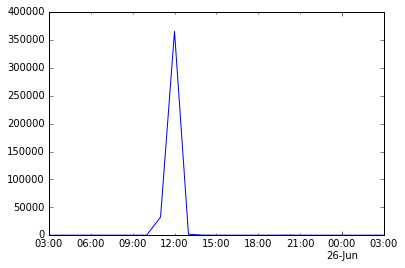

In [49]:
status_df.plot()
legend()

In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
